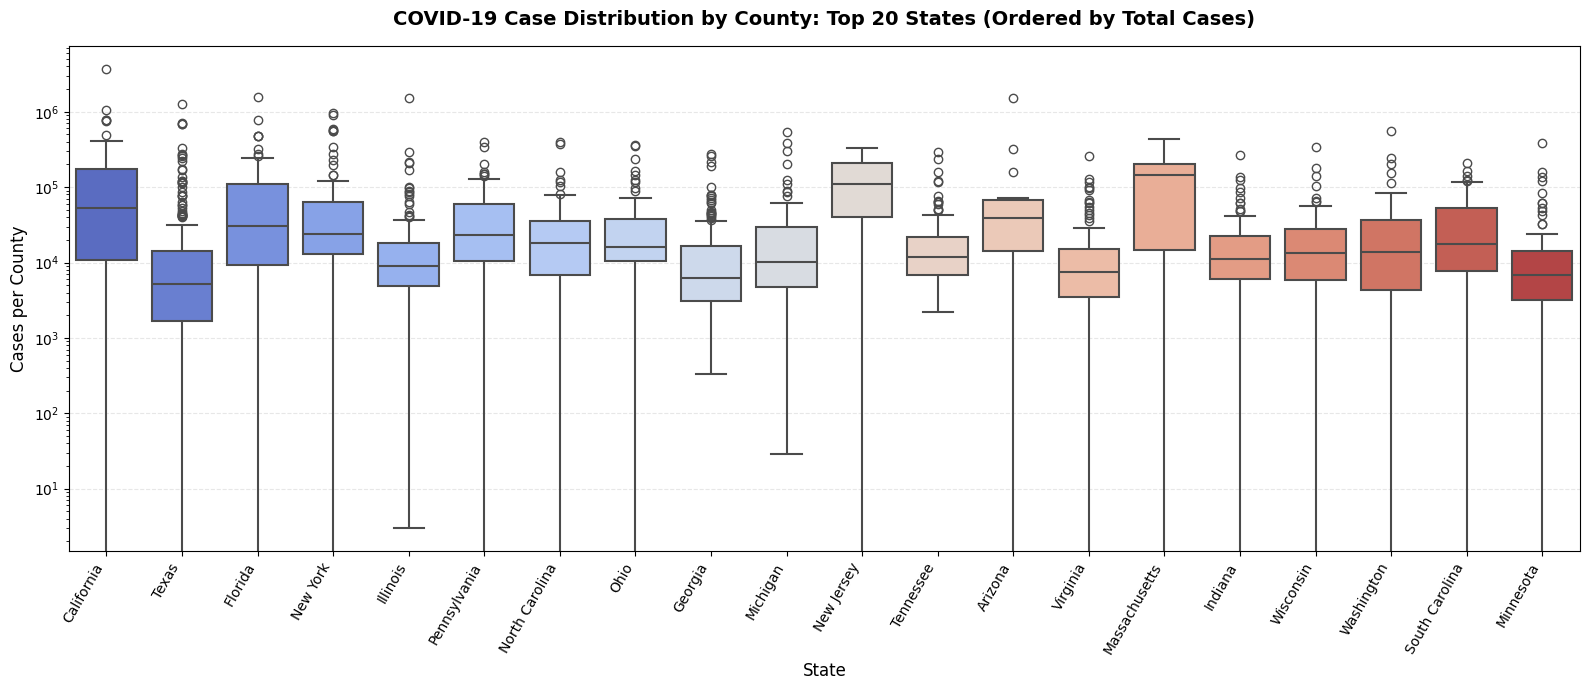

In [3]:
# Extra Credit: Grouped Boxplot of States

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Downloads
covid_df = pd.read_csv('/Users/u1024341/Downloads/covid_data.csv')

# Extra Credit: Seaborn grouped boxplot - Get date columns
date_columns = [col for col in covid_df.columns if '/' in col]

# Calculate total cases per state
state_totals = covid_df.groupby('Province_State')[date_columns[-1]].sum()

# Sort states by total cases (descending) and get top 20
top_states = state_totals.sort_values(ascending=False).head(20).index.tolist()

# Prepare data for boxplot
boxplot_data = []
for state in top_states:
    state_counties = covid_df[covid_df['Province_State'] == state]
    for case_count in state_counties[date_columns[-1]]:
        boxplot_data.append({
            'State': state,
            'Cases': case_count
        })

# Create dataframe
boxplot_df = pd.DataFrame(boxplot_data)

# Create the boxplot with fixed syntax
plt.figure(figsize=(16, 7))
sns.boxplot(data=boxplot_df, x='State', y='Cases', 
            hue='State', order=top_states, palette='coolwarm', 
            linewidth=1.5, legend=False)

# Format plot
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.title('COVID-19 Case Distribution by County: Top 20 States (Ordered by Total Cases)', 
          fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Cases per County', fontsize=12)
plt.xlabel('State', fontsize=12)

# Use log scale for better visualization
plt.yscale('log')

# Add grid
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()